# MLPRegressor

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Zad.

Proszę narysować wykres dowolnej funkcji na odcinku $[0,3]$.

Będzie to model, który będziemy chcieli znaleźć.

In [2]:
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
x_tr = np.linspace(0, 3, 200)
y_tr = f(x_tr)
x = stats.uniform(0,3).rvs(100)
y = f(x) + stats.norm(0,0.2).rvs(len(x))

# Zadanie
Wykonaj regresję z różnymi parametrami.

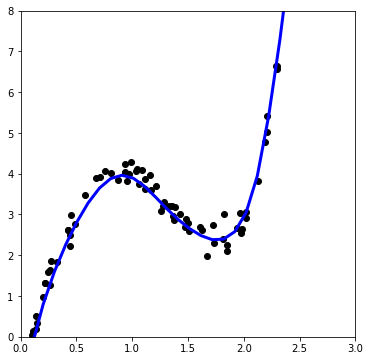

In [3]:
x=np.vstack(x)
x_plot = np.vstack(np.linspace(0, 10, 100))

MLP = MLPRegressor(hidden_layer_sizes=(100, 50, 10), activation='tanh', max_iter=50000, batch_size=20, learning_rate_init=0.001, learning_rate="adaptive", solver='adam')
y_rbf = MLP.fit(x,y)

# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
plt.plot(x_plot, MLP.predict(x_plot), color='blue',linewidth=3)
plt.show()



In [4]:
from sklearn import  metrics

metrics.r2_score(y, MLP.predict(x))

0.9946160631442222

# Zad. 
Wykonaj walidecję krzyżową.

In [6]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(MLPRegressor(hidden_layer_sizes=(100, 50, 10), activation='tanh', learning_rate="adaptive", solver='adam'),
                    param_grid={
                        'max_iter': [20000, 50000],
                        'batch_size': [15, 30],
                        'learning_rate_init': [0.001, 0.01],
                    },
                    refit=False)
#make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()).get_params().keys()
grid.fit(x, y)
grid.best_params_

{'batch_size': 30, 'learning_rate_init': 0.001, 'max_iter': 50000}

# Zad.
wykonaj walidację krzyżową dla modelu MLPRegressor


In [8]:
import pandas as pd
df_adv = pd.read_csv('./Advertising.csv', index_col=0)
X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [9]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(MLPRegressor(hidden_layer_sizes=(100, 50, 10), activation='tanh', learning_rate="adaptive", learning_rate_init=0.001, solver='adam'),
                    param_grid={
                        'max_iter': [20000, 50000],
                        'batch_size': [15, 30],
                    },
                    refit=False)
#make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()).get_params().keys()
grid.fit(X, y)
grid.best_params_

/Users/jakubpiasecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Users/jakubpiasecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


{'batch_size': 15, 'max_iter': 20000}

In [ ]:
from sklearn import  metrics
metrics.r2_score(y_true= y, y_pred= grid.best_estimator_.predict(X))